In [29]:
## import package here
## If IDE is used, please make sure the 
## pakage is also included in your project interpreter


## connect to database
## make sure the MySQL database is running
## please change the user and password to yours
## please establish new database yelp_db for the first time

In [32]:
import pandas as pd
import numpy as np



import mysql.connector
import pylab
import operator
import warnings
warnings.filterwarnings('ignore')


import matplotlib.cm as cm 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline


In [34]:


connection = mysql.connector.connect(
    user='root',
    password='qiuran1223',
    host='127.0.0.1',
    port=3306,
    database='yelp_db')


## connect to database
## make sure the MySQL database is running
## please change the user and password to yours
## please establish new database yelp_db for the first time


In [35]:
## Select a typical city to analysis

restaurants = pd.read_sql("SELECT business.city, business.state, COUNT(*) "
                          "AS 'Number of Restaurants for each City' "
                          "FROM business INNER JOIN category on "
                          "business.id = category.business_id "
                          "WHERE category.category = 'Restaurants' "
                          "GROUP BY business.state, business.city "
                          "ORDER BY COUNT(*) DESC;", connection).values
numbers = []
cityStates = []
print("total cities:", len(restaurants))


total cities: 776


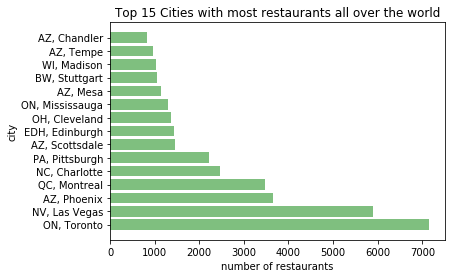

In [36]:

for restaurant in restaurants[0:15]:
    state = restaurant[0]
    city = restaurant[1]
    cityState = city + ", " + state
    cityStates.append(cityState)
    numbers.append(restaurant[2])

y_pos = np.arange(len(cityStates))
plt.barh(y_pos, numbers, align='center', alpha=0.5, color='green')
plt.yticks(y_pos, cityStates)
plt.xlabel('number of restaurants')
plt.ylabel('city')
plt.title('Top 15 Cities with most restaurants all over the world')
    
del cityStates, numbers, restaurants


In [37]:
restaurants = pd.read_sql("SELECT business.state,COUNT(*) "
                          "AS 'Number of Restaurants per State' "
                          "FROM business INNER JOIN category on "
                          "business.id = category.business_id "
                          "WHERE category.category = 'Restaurants' "
                          "GROUP BY business.state "
                          "ORDER BY COUNT(*) DESC limit 10;", connection).values


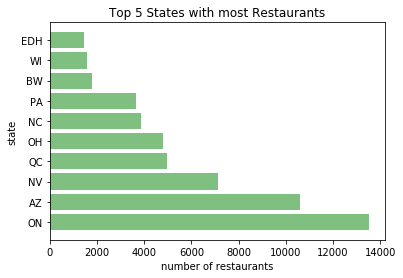

In [38]:


labels = []
values = []
for restaurant in restaurants:
    labels.append(restaurant[0])
    values.append(restaurant[1])

y_pos = np.arange(len(labels))
plt.barh(y_pos, values, align='center', alpha=0.5,color='green')
plt.yticks(y_pos, labels)
plt.xlabel('number of restaurants')
plt.ylabel('state')
plt.title('Top 5 States with most Restaurants')

del labels, values, restaurants


In [39]:
## detail analysis and exploration for LV starts from here


cuisine_df = pd.read_sql("SELECT category.category, COUNT(category.category) "
                         "AS 'Cuisine Count' FROM business "
                         "INNER JOIN category "
                         "on business.id = category.business_id "
                         "WHERE business.city = 'Las Vegas' "
                         "GROUP BY category.category ORDER BY COUNT(category.category) DESC;", 
                         connection).values
data = {}

for cuisine in cuisine_df:
    name,count = cuisine
    data[name]=count
# this graph is too long to disturbing, so I comment it after getting the graph
# yPos = np.arange(len(list(data.keys())))
# plt.figure(1, [5, 250]) 
# plt.ylim(0,max(yPos)+1) 
# plt.tick_params(axis='both', which='major', labelsize=10) 
# 
# dataValue=list(data.values())


# plt.barh(yPos, dataValue, align='center', alpha=0.5)
# plt.yticks(yPos, data.keys())
# plt.xlabel('# restaurants')
# plt.ylabel('categories')
# 
# plt.show()

del cuisine_df

In [40]:
def dict_clean(dic):
    result = {}
    for key, value in dic.items():
        if value is None:
            value = 0
        result[key] = value
    return result

# def dict_clean_whole(dic):
#     for eachite in dic:
#         dict_clean(eachite)
# 

# Restaurants : 5902 



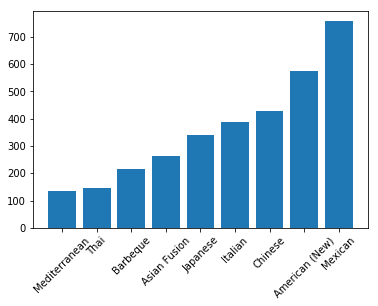

In [41]:


cuisines_data = {}
print("# Restaurants : %s \n" %  data.get('Restaurants'))
cuisines_data['Italian']=data.get('Italian')
cuisines_data['Chinese']=data.get('Chinese')
cuisines_data['Mexican']=data.get('Mexican')
cuisines_data['Mediterranean']=data.get('Mediterranean')
cuisines_data['Japanese']=data.get('Japanese')
cuisines_data['Thai']=data.get('Thai')
cuisines_data['Barbeque']=data.get('Barbeque')
cuisines_data['Asian Fusion']=data.get('Asian Fusion')
cuisines_data['Indian']=data.get('Indian')
cuisines_data['Middle Eastern']=data.get('Middle Eastern')
cuisines_data['Greek']=data.get('Greek')
cuisines_data['French']=data.get('French')
cuisines_data['Tex-Mex']=data.get('Tex-Mex')
cuisines_data['Korean']=data.get('Korean')
cuisines_data['Turkish']=data.get('KoreTurkishan')
cuisines_data['Caribbean']=data.get('Caribbean')
cuisines_data['Vietnamese']=data.get('Vietnamese')
cuisines_data['Southern']=data.get('Southern')
cuisines_data['Lebanese']=data.get('Lebanese')
cuisines_data['Irish']=data.get('Irish')
cuisines_data['Pakistani']=data.get('Pakistani')
cuisines_data['Cuban']=data.get('Cuban')
cuisines_data['Spanish']=data.get('Spanish')
cuisines_data['Cambodian']=data.get('Cambodian')
cuisines_data['Brazilian']=data.get('Brazilian')
cuisines_data['Argentine']=data.get('Argentine')
cuisines_data['Bangladeshi']=data.get('Bangladeshi')
cuisines_data['American (New)']=data.get('American (New)')
cuisines_data['Latin American']=data.get('Latin American')
cuisines_data['Hawaiian']=data.get('Hawaiian')
cuisines_data['Irish Pub']=data.get('Irish Pub')
cuisines_data['Malaysian']=data.get('Malaysian')
cuisines_data['Russian']=data.get('Russian')
cuisines_data['Colombian']=data.get('Colombian')
cuisines_data['Argentine']=data.get('Argentine')
cuisines_data['Hungarian']=data.get('Hungarian')
cuisines_data['Portuguese']=data.get('Portuguese')
cuisines_data['Himalayan/Nepalese']=data.get('Himalayan/Nepalese')
cuisines_data['Pan Asian']=data.get('Pan Asian')
cuisines_data['Egyptian']=data.get('Egyptian')
cuisines_data['Filipino']=data.get('Filipino')
cuisines_data['Mongolian']=data.get('Mongolian')
cuisines_data['African']=data.get('African')
cuisines_data['Moroccan']=data.get('Moroccan')
cuisines_data['British']=data.get('British')
cuisines_data['German']=data.get('German')
cuisines_data['Belgian']=data.get('Belgian')
cuisines_data['Taiwanese']=data.get('Taiwanese')
cuisines_data['Vegan']=data.get('Vegan')
cuisines_data['American (Traditional)']=data.get('American (Traditional)')

cuisines_data = dict_clean(cuisines_data)
cuisines_data = sorted(cuisines_data.items(), key=lambda kv: kv[1])[-10:]
result={}
for i in range(9):
    result[cuisines_data[i][0]]=cuisines_data[i][1]

plt.bar(range(len(result)), list(result.values()), align='center')
plt.xticks(range(len(result)),list(result.keys()))

plt.xticks(rotation=45)
plt.show()


In [42]:
def locStarScatter(df):
    colordata = np.log(df.review_count)
    locStar = sorted(zip(df['longitude'], df['latitude'], 
                         colordata))
    plt.scatter([l[1] for l in locStar],
                [l[0] for l in locStar],
                c=[l[2] for l in locStar], 
                vmin=0.5,vmax=6, lw=0)
    plt.ylabel('longitude') 
    plt.xlabel('latitude')




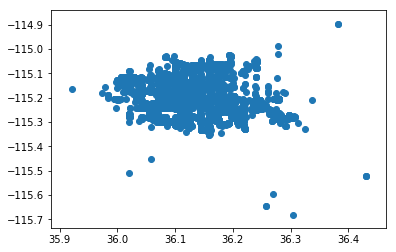

In [43]:
## distribution of restuarant on LV


data = pd.read_sql("select business.id, business.name, business.neighborhood, business.latitude, business.longitude, business.review_count "
                   "from business inner join category on business.id = category.business_id "
                   "where business.city = 'Las Vegas' and category.category = 'Restaurants' group by business.id order by business.neighborhood ASC;", connection).values

column_names=('id','name','neighborhood','latitude','longitude', 'review_count')
business_df = pd.DataFrame(data=data[0:,0:], index=data[0:,0], columns=column_names)
business_df = business_df[['id','name','neighborhood','latitude','longitude', 'review_count']]

business_df.review_count = business_df.review_count.astype('float64')
business_df.latitude = business_df.latitude.astype('float64')
business_df.longitude = business_df.longitude.astype('float64')

pylab.scatter(business_df.latitude,business_df.longitude)

In [44]:
import operator
import folium

start_loc = (business_df.latitude[0], business_df.longitude[0])
myMap = folium.Map(width=950,height=570,location=start_loc, zoom_start=10)

for i in range(len(business_df.longitude)):
    try:
        point = (business_df.latitude[i],business_df.longitude[i])
        folium.Marker(point).add_to(myMap)
    except:
        pass
myMap


<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLm1pbi5jc3MiLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC10aGVtZS5taW4uY3NzIi8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9MZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy8yLjAuMi9sZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy5jc3MiLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9yYXdnaXQuY29tL3B5dGhvbi12aXN1YWxpemF0aW9uL2ZvbGl1bS9tYXN0ZXIvZm9saXVtL3RlbXBsYXRlcy9sZWFmbGV0LmF3ZXNvbWUucm90YXRlLmNzcyIvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfZjIxZmUwOGE2MmQzNDVlN2FmYTQxMTNhNWJkOGJlZTQgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogOTUwLjBweDsKICAgICAgICAgICAgICAgIGhlaWdodDogNTcwLjBweDsKICAgICAgICAgICAgICAgIGxlZnQ6IDAuMCU7CiAgICAgICAgICAgICAgICB0b3A6IDAuMCU7CiAgICAgICAgICAgICAgICB9CiAgICAgICAgICAgIDwvc3R5bGU+CiAgICAgICAgCjwvaGVhZD4KPGJvZHk+ICAgIAogICAgCiAgICAgICAgICAgIDxkaXYgY2xhc3M9ImZvbGl1bS1tYXAiIGlkPSJtYXBfZjIxZmUwOGE2MmQzNDVlN2FmYTQxMTNhNWJkOGJlZTQiID48L2Rpdj4KICAgICAgICAKPC9ib2R5Pgo8c2NyaXB0PiAgICAKICAgIAoKICAgICAgICAgICAgCiAgICAgICAgICAgICAgICB2YXIgYm91bmRzID0gbnVsbDsKICAgICAgICAgICAgCgogICAgICAgICAgICB2YXIgbWFwX2YyMWZlMDhhNjJkMzQ1ZTdhZmE0MTEzYTViZDhiZWU0ID0gTC5tYXAoCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAnbWFwX2YyMWZlMDhhNjJkMzQ1ZTdhZmE0MTEzYTViZDhiZWU0JywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHtjZW50ZXI6IFszNi4xOTY0LC0xMTUuMjM0XSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHpvb206IDEwLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgbWF4Qm91bmRzOiBib3VuZHMsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICBsYXllcnM6IFtdLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgd29ybGRDb3B5SnVtcDogZmFsc2UsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICBjcnM6IEwuQ1JTLkVQU0czODU3CiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIH0pOwogICAgICAgICAgICAKICAgICAgICAKICAgIAogICAgICAgICAgICB2YXIgdGlsZV9sYXllcl9iMmEwMzM2OTE5NmY0N2EyYWIyZmYzYWIyZmY3ZjQxNSA9IEwudGlsZUxheWVyKAogICAgICAgICAgICAgICAgJ2h0dHBzOi8ve3N9LnRpbGUub3BlbnN0cmVldG1hcC5vcmcve3p9L3t4fS97eX0ucG5nJywKICAgICAgICAgICAgICAgIHsKICAiYXR0cmlidXRpb24iOiBudWxsLAogICJkZXRlY3RSZXRpbmEiOiBmYWxzZSwKICAibWF4Wm9vbSI6IDE4LAogICJtaW5ab29tIjogMSwKICAibm9XcmFwIjogZmFsc2UsCiAgInN1YmRvbWFpbnMiOiAiYWJjIgp9CiAgICAgICAgICAgICAgICApLmFkZFRvKG1hcF9mMjFmZTA4YTYyZDM0NWU3YWZhNDExM2E1YmQ4YmVlNCk7CiAgICAgICAgCiAgICAKCiAgICAgICAgICAgIHZhciBtYXJrZXJfZTUxODkxMzNiODRkNGZjYTg4MjQ2ZDU0NWM1MmYxYTkgPSBMLm1hcmtlcigKICAgICAgICAgICAgICAgIFszNi4xOTY0LC0

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLm1pbi5jc3MiLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC10aGVtZS5taW4uY3NzIi8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9MZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy8yLjAuMi9sZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy5jc3MiLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9yYXdnaXQuY29tL3B5dGhvbi12aXN1YWxpemF0aW9uL2ZvbGl1bS9tYXN0ZXIvZm9saXVtL3RlbXBsYXRlcy9sZWFmbGV0LmF3ZXNvbWUucm90YXRlLmNzcyIvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfZWQyYzA1OTM0ODI5NGYzNTg0MjZjNWU0NmE0ZjBjYjQgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogOTUwLjBweDsKICAgICAgICAgICAgICAgIGhlaWdodDogNTcwLjBweDsKICAgICAgICAgICAgICAgIGxlZnQ6IDAuMCU7CiAgICAgICAgICAgICAgICB0b3A6IDAuMCU7CiAgICAgICAgICAgICAgICB9CiAgICAgICAgICAgIDwvc3R5bGU+CiAgICAgICAgCjwvaGVhZD4KPGJvZHk+ICAgIAogICAgCiAgICAgICAgICAgIDxkaXYgY2xhc3M9ImZvbGl1bS1tYXAiIGlkPSJtYXBfZWQyYzA1OTM0ODI5NGYzNTg0MjZjNWU0NmE0ZjBjYjQiID48L2Rpdj4KICAgICAgICAKPC9ib2R5Pgo8c2NyaXB0PiAgICAKICAgIAoKICAgICAgICAgICAgCiAgICAgICAgICAgICAgICB2YXIgYm91bmRzID0gbnVsbDsKICAgICAgICAgICAgCgogICAgICAgICAgICB2YXIgbWFwX2VkMmMwNTkzNDgyOTRmMzU4NDI2YzVlNDZhNGYwY2I0ID0gTC5tYXAoCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAnbWFwX2VkMmMwNTkzNDgyOTRmMzU4NDI2YzVlNDZhNGYwY2I0JywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHtjZW50ZXI6IFszNi4xNzU3LC0xMTUuMjI0XSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHpvb206IDEwLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgbWF4Qm91bmRzOiBib3VuZHMsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICBsYXllcnM6IFtdLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgd29ybGRDb3B5SnVtcDogZmFsc2UsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICBjcnM6IEwuQ1JTLkVQU0czODU3CiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIH0pOwogICAgICAgICAgICAKICAgICAgICAKICAgIAogICAgICAgICAgICB2YXIgdGlsZV9sYXllcl9lZjFhN2Q4YjNjZGM0OTY0YTNmMjc5NjRlY2Y2MzA1MyA9IEwudGlsZUxheWVyKAogICAgICAgICAgICAgICAgJ2h0dHBzOi8ve3N9LnRpbGUub3BlbnN0cmVldG1hcC5vcmcve3p9L3t4fS97eX0ucG5nJywKICAgICAgICAgICAgICAgIHsKICAiYXR0cmlidXRpb24iOiBudWxsLAogICJkZXRlY3RSZXRpbmEiOiBmYWxzZSwKICAibWF4Wm9vbSI6IDE4LAogICJtaW5ab29tIjogMSwKICAibm9XcmFwIjogZmFsc2UsCiAgInN1YmRvbWFpbnMiOiAiYWJjIgp9CiAgICAgICAgICAgICAgICApLmFkZFRvKG1hcF9lZDJjMDU5MzQ4Mjk0ZjM1ODQyNmM1ZTQ2YTRmMGNiNCk7CiAgICAgICAgCiAgICAKCiAgICAgICAgICAgIHZhciBtYXJrZXJfOWFiMWI4ZGQ3YWMzNGQ0N2I3ZTlkZWNiNGNkODNjY2IgPSBMLm1hcmtlcigKICAgICAgICAgICAgICAgIFszNi4xNzU3LC0

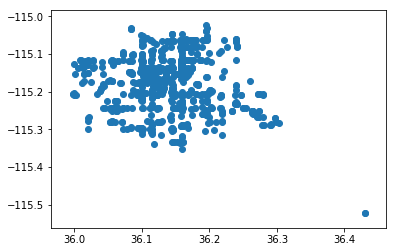

In [31]:
data = pd.read_sql("select business.id, business.name, business.neighborhood, "
                   "business.latitude, business.longitude, "
                   "business.review_count from business inner join category on "
                   "business.id = category.business_id "
                   "where business.city = 'Las Vegas' and "
                   "category.category = 'Mexican' group by business.id order by "
                   "business.neighborhood ASC;", connection).values

column_names=('id','name','neighborhood','latitude','longitude', 'review_count')
business_df = pd.DataFrame(data=data[0:,0:], index=data[0:,0], columns=column_names)
business_df = business_df[['id','name','neighborhood','latitude','longitude', 'review_count']]

business_df.review_count = business_df.review_count.astype('float64')
business_df.latitude = business_df.latitude.astype('float64')
business_df.longitude = business_df.longitude.astype('float64')

pylab.scatter(business_df.latitude,business_df.longitude)

start_loc = (business_df.latitude[0], business_df.longitude[0])
myMap2 = folium.Map(width=950,height=570,location=start_loc, zoom_start=10)

for i in range(len(business_df.longitude)):
    try:
        point = (business_df.latitude[i],business_df.longitude[i])
        folium.Marker(point).add_to(myMap2)
    except:
        pass
myMap2

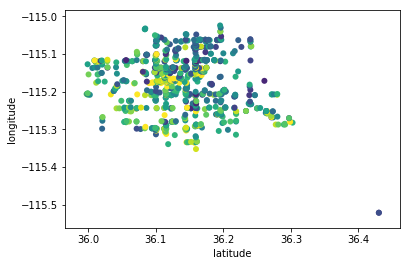

In [33]:
locStarScatter(business_df)